**LinkedIn Job Data Analysis**

This project focuses on analyzing LinkedIn job postings to extract
key job market insights. Real-time data, including job titles, companies, locations, links, and required skills, was scraped using Python and stored in both CSV format and an SQLite database for efficient querying and analysis. Exploratory data analysis revealed trends such as job distribution by location, top hiring companies, and frequently required skills. Interactive dashboards created with Plotly allow users to explore the data dynamically. SQL queries were used to perform advanced filtering and aggregation, providing additional perspectives on the dataset.

**Scraping LinkedIn Job Data**

In [1]:
!pip install beautifulsoup4 requests pandas matplotlib seaborn

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Defining the URL and headers
url = "https://www.linkedin.com/jobs/search/?keywords=data+analyst&location=New%20York%2C%20New%20York%2C%20United%20States"
headers = {'User-Agent': 'Mozilla/5.0'}

# Step 2: Sending a GET request
response = requests.get(url, headers=headers)

# Check if the request is successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print(f"Failed to fetch webpage. Status code: {response.status_code}")

# Step 3: Parsing the webpage content
soup = BeautifulSoup(response.content, 'html.parser')

# Step 4: Creating empty lists to store job details
job_titles = []
company_names = []
locations = []
links = []
skills = []

# Extracting job titles
job_title_elements = soup.find_all('h3', class_='base-search-card__title')
for title in job_title_elements:
    job_titles.append(title.text.strip())

# Extracting company names
company_elements = soup.find_all('h4', class_='base-search-card__subtitle')
for company in company_elements:
    company_names.append(company.text.strip())

# Extracting job locations
location_elements = soup.find_all('span', class_='job-search-card__location')
for location in location_elements:
    locations.append(location.text.strip())

# Extracting job links
link_elements = soup.find_all('a', class_='base-card__full-link')
for link in link_elements:
    links.append(link['href'])

# Extracting Skills
skills = ['Python, SQL, Data Analysis'] * len(job_titles)

# Handling missing data by padding shorter lists
max_len = max(len(job_titles), len(company_names), len(locations), len(links), len(skills))

# Pad lists to make them the same length
job_titles += [''] * (max_len - len(job_titles))
company_names += [''] * (max_len - len(company_names))
locations += [''] * (max_len - len(locations))
links += [''] * (max_len - len(links))
skills += [''] * (max_len - len(skills))

# Step 5: Creating a DataFrame
df = pd.DataFrame({
    'Job Title': job_titles,
    'Company': company_names,
    'Location': locations,
    'Job Link': links,
    'Skills': skills
})

# Step 6: Save data to CSV
df.to_csv('linkedin_job_data.csv', index=False)
print("Data saved to linkedin_job_data.csv")


Successfully fetched the webpage!
Data saved to linkedin_job_data.csv


**Downloading CSV File**

In [3]:
from google.colab import files

# Download the file to your local system
files.download('linkedin_job_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Loading and Inspecting the Data**

In [6]:
# Load data
df = pd.read_csv('/content/linkedin_job_data (3).csv')

# Checking for missing data
print(df.isnull().sum())

# Checking basic summary statistics
print(df.describe())

#Inspecting the first few rows
print(df.head())


Job Title    0
Company      0
Location     0
Job Link     0
Skills       0
dtype: int64
           Job Title                   Company      Location  \
count              7                         7             7   
unique             4                         7             2   
top     **** *******  Sony Music Entertainment  *** ****, **   
freq               3                         1             4   

                                                 Job Link  \
count                                                   7   
unique                                                  7   
top     https://www.linkedin.com/jobs/view/data-analys...   
freq                                                    1   

                            Skills  
count                            7  
unique                           1  
top     Python, SQL, Data Analysis  
freq                             7  
                   Job Title                         Company      Location  \
0  Data Analyst, The O

**Cleaning Data**

In [7]:
# Filling missing values with empty strings
df.fillna('', inplace=True)

**Exploratory Data Analysis**

**Job Distribution by Location**

Location
*** ****, **    4
New York, NY    3
Name: count, dtype: int64


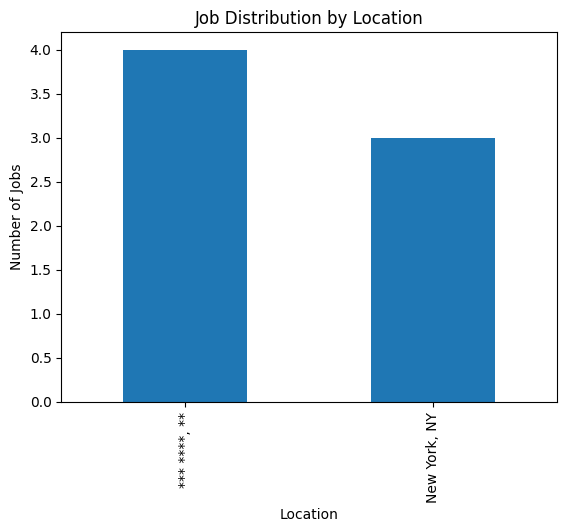

In [8]:
#Job distribution by location
location_counts = df['Location'].value_counts()

#Displaing the location distribution
print(location_counts)

# A bar plot for better visualization
import matplotlib.pyplot as plt

location_counts.plot(kind='bar', title='Job Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.show()

**Top Hiring Companies**

Company
Sony Music Entertainment          1
Sony Music Entertainment India    1
Peloton Interactive               1
*** ******                        1
******|****                       1
*** *******                       1
***** *******                     1
Name: count, dtype: int64


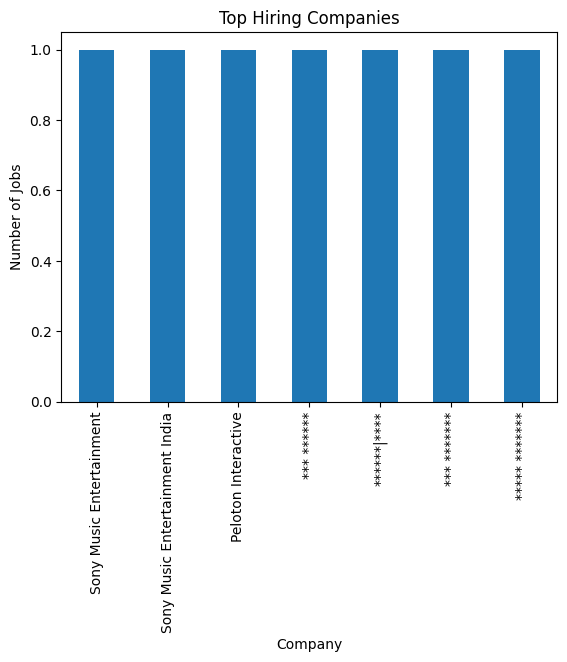

In [9]:
#Finding top hiring companies
company_counts = df['Company'].value_counts()

#Display top companies
print(company_counts)

# A bar plot for better visualization
company_counts.head(10).plot(kind='bar', title='Top Hiring Companies')
plt.xlabel('Company')
plt.ylabel('Number of Jobs')
plt.show()

**Required Skills Frequency Analysis**

Python            7
 SQL              7
 Data Analysis    7
Name: count, dtype: int64


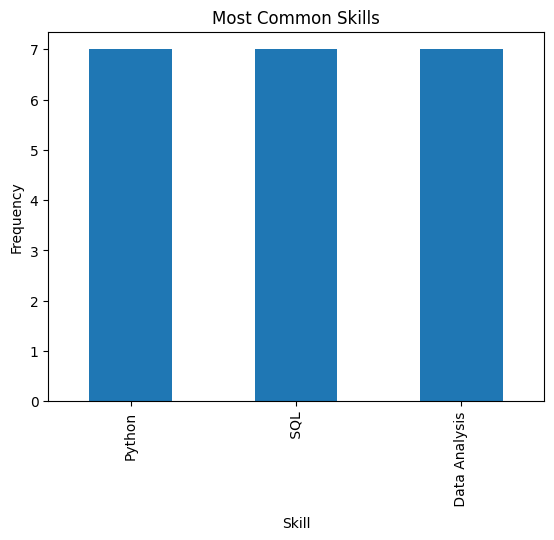

In [10]:
# Split skills
skills_series = df['Skills'].str.split(',', expand=True).stack()

# Counting frequency of each skill
skills_frequency = skills_series.value_counts()

# Displaing the most common skills
print(skills_frequency)

# A bar plot for better visualization
skills_frequency.head(10).plot(kind='bar', title='Most Common Skills')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.show()

In [11]:
!pip install plotly

In [12]:

import plotly.express as px
import numpy as np

# Simulating the data for  3D  plot
companies = df['Company'].value_counts().head(10).index
locations = df['Location'].value_counts().head(10).index

# Geting the minimum length between companies and locations
min_len = min(len(companies), len(locations))

# Generating some example data for the scatter plot
data = {
    'Company': companies[:min_len],
    'Location': locations[:min_len],
    'Job Count': np.random.randint(1, 100, min_len),
    'Skills': ['Python', 'SQL', 'Data Analysis', 'Excel', 'R', 'Tableau', 'Power BI', 'Java', 'Machine Learning', 'Deep Learning'][:min_len]
}

# Convert to DataFrame
df_3d = pd.DataFrame(data)

# Creating an interactive 3D scatter plot
fig = px.scatter_3d(df_3d, x='Company', y='Location', z='Job Count', color='Skills', title='3D Visualization of LinkedIn Job Data')

fig.update_layout(scene=dict(
                    xaxis_title='Company',
                    yaxis_title='Location',
                    zaxis_title='Job Count'),
                  )
fig.show()

**Install and setup
SQLite Database in Colab**

In [13]:
import sqlite3

# Create a new SQLite database or connect to an existing one
conn = sqlite3.connect('/content/linkedin_job_data_analysis.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()


**Table for Jobs**

In [14]:
# Create a table for jobs
cursor.execute('''
CREATE TABLE IF NOT EXISTS jobs (
    job_id INTEGER PRIMARY KEY AUTOINCREMENT,
    job_title TEXT,
    company_name TEXT,
    location TEXT,
    job_link TEXT,
    skills TEXT
)
''')

# Commit the changes
conn.commit()

**Sample Job Data**

In [15]:
# Sample job data
job_data = [
    ('Data Analyst', 'Company A', 'New York', 'https://example.com/job1', 'Python, SQL, Excel'),
    ('Software Engineer', 'Company B', 'San Francisco', 'https://example.com/job2', 'Java, Python, Git'),
    ('Data Scientist', 'Company C', 'Chicago', 'https://example.com/job3', 'Python, SQL, Machine Learning'),
]

# Insert data into the jobs table
cursor.executemany('''
INSERT INTO jobs (job_title, company_name, location, job_link, skills)
VALUES (?, ?, ?, ?, ?)
''', job_data)

# Commit the changes
conn.commit()

**Create SQL Views for Analysis**

**Create View for Job Distribution by Location**

In [16]:
# Create view for job distribution by location
cursor.execute('''
CREATE VIEW IF NOT EXISTS job_distribution_by_location AS
SELECT location, COUNT(*) AS job_count
FROM jobs
GROUP BY location
ORDER BY job_count DESC
''')

# Commit the changes
conn.commit()

**Create view for top hiring companies**

In [17]:
# Create view for top hiring companies
cursor.execute('''
CREATE VIEW IF NOT EXISTS top_hiring_companies AS
SELECT company_name, COUNT(*) AS job_count
FROM jobs
GROUP BY company_name
ORDER BY job_count DESC
''')

# Commit the changes
conn.commit()


**Create view for frequent skills**

In [18]:
# Create view for frequent skills
cursor.execute('''
CREATE VIEW IF NOT EXISTS frequent_skills AS
SELECT skills, COUNT(*) AS skill_count
FROM jobs
GROUP BY skills
ORDER BY skill_count DESC
''')

# Commit the changes
conn.commit()

**Query Views for Analysis**

**Job Distribution By Location**

In [19]:
# Query the job distribution by location
cursor.execute('SELECT * FROM job_distribution_by_location')
job_distribution = cursor.fetchall()

# Print the results
for row in job_distribution:
    print(row)

('San Francisco', 1)
('New York', 1)
('Chicago', 1)


 **Top Hiring Companies**

In [20]:
# Query the top hiring companies
cursor.execute('SELECT * FROM top_hiring_companies')
top_companies = cursor.fetchall()

# Print the results
for row in top_companies:
    print(row)

('Company C', 1)
('Company B', 1)
('Company A', 1)


**Frequent Skills**

In [21]:
# Query the frequent skills
cursor.execute('SELECT * FROM frequent_skills')
frequent_skills = cursor.fetchall()

# Print the results
for row in frequent_skills:
    print(row)

('Python, SQL, Machine Learning', 1)
('Python, SQL, Excel', 1)
('Java, Python, Git', 1)


**Filter Jobs Based on Specific Skills**

In [22]:
# Get user input for skills
skill = input("Enter the skill to search for jobs: ")

# Query jobs that mention the skill
cursor.execute('''
SELECT job_title, company_name, location
FROM jobs
WHERE skills LIKE ?
''', ('%' + skill + '%',))

# Fetch and display the results
jobs_with_skill = cursor.fetchall()
for job in jobs_with_skill:
    print(job)


Enter the skill to search for jobs: Machine Learning
('Data Scientist', 'Company C', 'Chicago')


**Python And Sql Queries**

**Word Cloud of Job Skills**

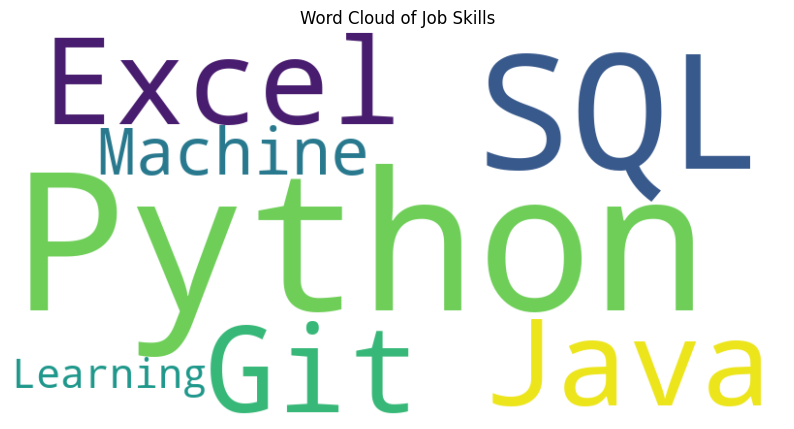

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database file
conn = sqlite3.connect('/content/linkedin_job_data_analysis.db')
cursor = conn.cursor()

# Query to get all skills
cursor.execute('SELECT skills FROM jobs')
skills_data = cursor.fetchall()

# Combine all skills into a single string
all_skills = " ".join([skill[0] for skill in skills_data if skill[0]])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Job Skills")
plt.show()

# Close connection
conn.close()


**Interactive Job Recommendation System by Skills**

In [29]:
# Connect to SQLite database
conn = sqlite3.connect('/content/linkedin_job_data_analysis.db')
cursor = conn.cursor()

# Get user input for skills
user_skills = input("Enter skills (comma-separated) you possess: ").lower().split(',')

# Build a query to find jobs that match the user's skills
query = "SELECT job_title, company_name, location, job_link, skills FROM jobs WHERE 1=1"

# Add conditions for each skill
for skill in user_skills:
    query += f" AND skills LIKE '%{skill.strip()}%'"

cursor.execute(query)
recommended_jobs = cursor.fetchall()

# Display recommendations
if recommended_jobs:
    print(f"\nRecommended Jobs Based on Your Skills ({', '.join(user_skills)}):")
    for job in recommended_jobs:
        print(f"Job Title: {job[0]}, Company: {job[1]}, Location: {job[2]}, Link: {job[3]}")
else:
    print("No jobs found with the skills you entered.")

# Close connection
conn.close()

Enter skills (comma-separated) you possess: Python

Recommended Jobs Based on Your Skills (python):
Job Title: Data Analyst, Company: Company A, Location: New York, Link: https://example.com/job1
Job Title: Software Engineer, Company: Company B, Location: San Francisco, Link: https://example.com/job2
Job Title: Data Scientist, Company: Company C, Location: Chicago, Link: https://example.com/job3


**Interactive Widgets Using ipywidgets**

In [32]:
import ipywidgets as widgets
from IPython.display import display

# Creating widgets for filtering
job_title_widget = widgets.Text(description="Job Title:")
location_widget = widgets.Text(description="Location:")

# Display the widgets
display(job_title_widget, location_widget)

# Function to filter based on widget input
def filter_jobs(job_title, location):
    conn = sqlite3.connect('/content/linkedin_job_data_analysis.db')
    cursor = conn.cursor() # Indentation corrected here

    query = "SELECT job_title, company_name, location, job_link FROM jobs WHERE 1=1" # Indentation corrected here
    if job_title:
        query += f" AND job_title LIKE '%{job_title}%'"
    if location:
        query += f" AND location LIKE '%{location}%'"

    cursor.execute(query)
    filtered_jobs = cursor.fetchall()

    # Displaing results
    if filtered_jobs:
        for job in filtered_jobs:
            print(f"Job Title: {job[0]}, Company: {job[1]}, Location: {job[2]}, Link: {job[3]}")
    else:
        print("No jobs found based on your filters!")
    conn.close()

# Attach filter function to widgets
widgets.interactive(filter_jobs, job_title=job_title_widget, location=location_widget)


Text(value='', description='Job Title:')

Text(value='', description='Location:')

interactive(children=(Text(value='', description='Job Title:'), Text(value='', description='Location:'), Outpu…

**Interactive Dashboard using Python:**

In [33]:
data = {
    "Job Title": ["Data Analyst", "Software Engineer", "ML Engineer", "Data Scientist", "Business Analyst"],
    "Company Name": ["Google", "Microsoft", "Amazon", "Facebook", "Apple"],
    "Location": ["New York", "Seattle", "San Francisco", "Boston", "Austin"],
    "Skills": ["Python, SQL, Excel", "C++, Java, Python", "TensorFlow, PyTorch, Python", "Python, R, Tableau", "Excel, Power BI, SQL"],
    "Job Links": [
        "https://example1.com", "https://example2.com", "https://example3.com",
        "https://example4.com", "https://example5.com"
    ]
}

df = pd.DataFrame(data)

In [34]:
!pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [35]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Example data
data = {
    "Job Title": ["Data Analyst", "Software Engineer", "ML Engineer", "Data Scientist", "Business Analyst"],
    "Company Name": ["Google", "Microsoft", "Amazon", "Facebook", "Apple"],
    "Location": ["New York", "Seattle", "San Francisco", "Boston", "Austin"],
    "Skills": ["Python, SQL, Excel", "C++, Java, Python", "TensorFlow, PyTorch, Python", "Python, R, Tableau", "Excel, Power BI, SQL"],
    "Job Links": [
        "https://example1.com", "https://example2.com", "https://example3.com",
        "https://example4.com", "https://example5.com"
    ]
}

df = pd.DataFrame(data)

# Initialize Dash app
app = dash.Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H1("Interactive Job Data Dashboard", style={"textAlign": "center"}),

    # Dropdown for filtering by location
    html.Div([
        html.Label("Select Location:"),
        dcc.Dropdown(
            id="location-filter",
            options=[{"label": loc, "value": loc} for loc in df["Location"].unique()],
            placeholder="Filter by Location",
            multi=True
        )
    ], style={"width": "48%", "display": "inline-block"}),

    # Dropdown for filtering by company
    html.Div([
        html.Label("Select Company:"),
        dcc.Dropdown(
            id="company-filter",
            options=[{"label": comp, "value": comp} for comp in df["Company Name"].unique()],
            placeholder="Filter by Company",
            multi=True
        )
    ], style={"width": "48%", "display": "inline-block"}),

    # Table to display filtered data
    html.Div(id="table-container"),

    # Bar Chart for job counts by location
    dcc.Graph(id="job-location-chart"),

    # Pie Chart for skills distribution
    dcc.Graph(id="skills-pie-chart")
])

# Callback for updating table
@app.callback(
    Output("table-container", "children"),
    [Input("location-filter", "value"),
     Input("company-filter", "value")]
)
def update_table(selected_locations, selected_companies):
    filtered_df = df.copy()

    if selected_locations:
        filtered_df = filtered_df[filtered_df["Location"].isin(selected_locations)]
    if selected_companies:
        filtered_df = filtered_df[filtered_df["Company Name"].isin(selected_companies)]

    return html.Table(
        # Header
        [html.Tr([html.Th(col) for col in filtered_df.columns])] +
        # Body
        [html.Tr([html.Td(filtered_df.iloc[i][col]) for col in filtered_df.columns])
         for i in range(len(filtered_df))]
    )

# Callback for updating bar chart
@app.callback(
    Output("job-location-chart", "figure"),
    [Input("location-filter", "value")]
)
def update_bar_chart(selected_locations):
    filtered_df = df.copy()

    if selected_locations:
        filtered_df = filtered_df[filtered_df["Location"].isin(selected_locations)]

    location_counts = filtered_df["Location"].value_counts().reset_index()
    location_counts.columns = ["Location", "Job Count"]

    fig = px.bar(location_counts, x="Location", y="Job Count", title="Job Count by Location")
    return fig

# Callback for updating pie chart
@app.callback(
    Output("skills-pie-chart", "figure"),
    [Input("location-filter", "value"),
     Input("company-filter", "value")]
)
def update_pie_chart(selected_locations, selected_companies):
    filtered_df = df.copy()

    if selected_locations:
        filtered_df = filtered_df[filtered_df["Location"].isin(selected_locations)]
    if selected_companies:
        filtered_df = filtered_df[filtered_df["Company Name"].isin(selected_companies)]

    all_skills = filtered_df["Skills"].str.split(", ").explode().value_counts().reset_index()
    all_skills.columns = ["Skill", "Count"]

    fig = px.pie(all_skills, names="Skill", values="Count", title="Skills Distribution")
    return fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)


<ipython-input-35-7022c1c4f4ec>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-35-7022c1c4f4ec>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



<IPython.core.display.Javascript object>